# Data Visualization
* Line Plot
* Histogram & denisty plot
* Box & whisker plot
* Heat Maps
* Lag plot or scatter plot
* AUtocorrelaltion plot

## Line plot

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

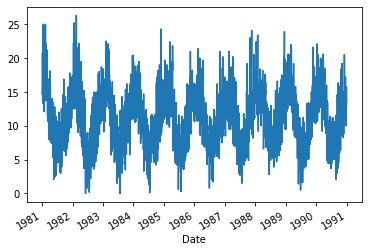

In [4]:
#Line plot
series=pd.read_csv("daily-minimum-temperatures.csv",squeeze=True,header=0,index_col=0,parse_dates=True)
series.plot()
plt.show()

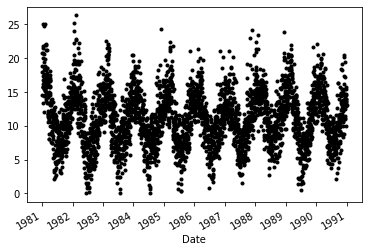

In [11]:
# Line plot with dots(dashes lines)
series.plot(style='k.')  # set style argument to "k." for dot & "k--" for dashed lines
plt.show()

It can be helpful to compare line plots for the same interval, such as from day-to-day,
month-to-month, and year-to-year.

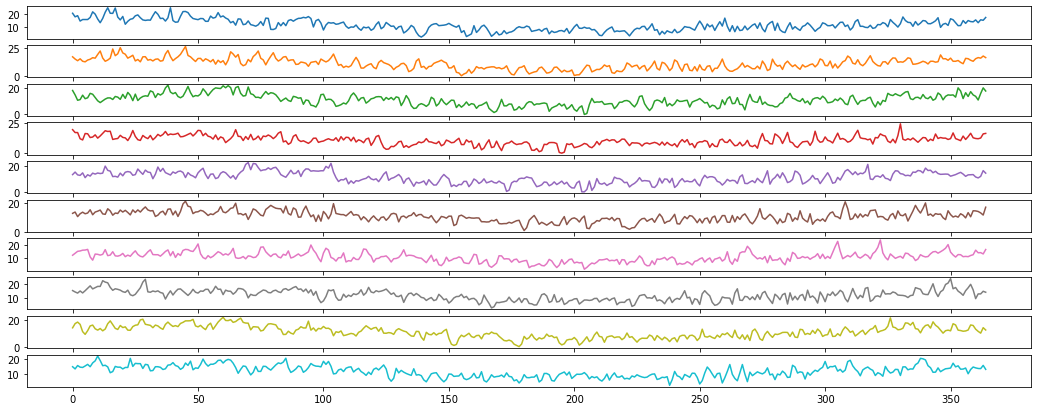

In [33]:
# Create stacked line plots
from pandas import Grouper
groups=series.groupby(Grouper(freq="A"))
years=pd.DataFrame()
for name,group in groups:
    years[name.year]=group.values
years.plot(subplots=True,legend=False,figsize=(18,7))
plt.show()    


In [32]:
years

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


## Histogram & Density Plot
Another important visualization is of the distribution of observations themselves. This means a
plot of the values without the temporal ordering.

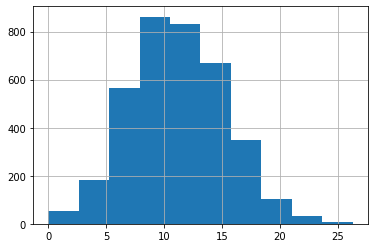

In [34]:
# Histogram of observation
series.hist()
plt.show()

We can get a better idea of the shape of the distribution of observations by using a density
plot. This is like the histogram, except a function is used to t the distribution of observations
and a nice, smooth line is used to summarize this distribution.

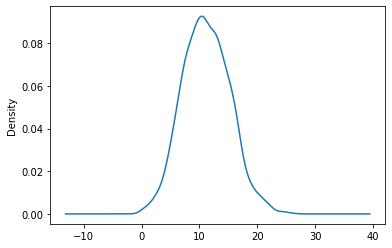

In [35]:
# Create a density plot
series.plot(kind='kde')
plt.show()

a distribution like this may suggest later exploring statistical
hypothesis tests to formally check if the distribution is Gaussian and perhaps data preparation
techniques to reshape the distribution, like the Box-Cox transform.

# Box & whisker plot
Histograms and density plots provide insight into the distribution of all observations, but we
may be interested in the distribution of values by time interval. Another type of plot that is
useful to summarize the distribution of observations is the box and whisker plot. This plot
draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of
observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above
and below the box to summarize the general extents of the observations. Dots are drawn for
outliers outside the whiskers or extents of the data.

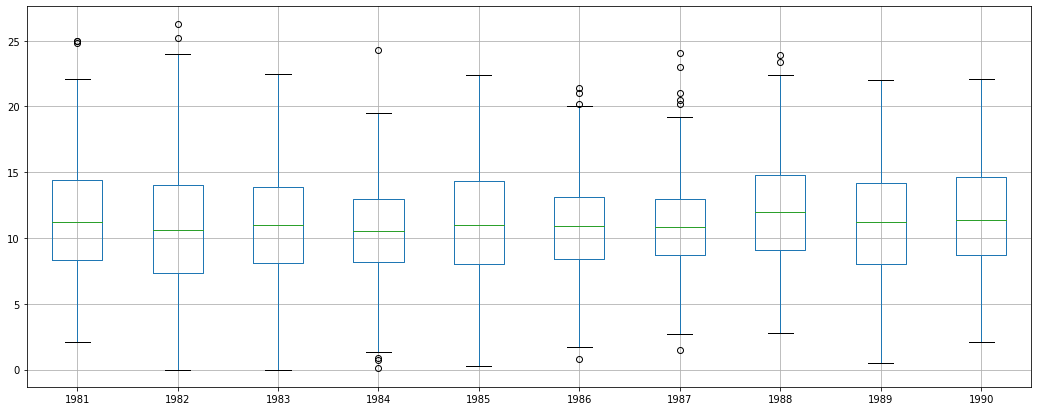

In [37]:
#Create a Box plot by yearly data
groups=series.groupby(Grouper(freq="A"))
years=pd.DataFrame()
for name,group in groups:
    years[name.year]=group.values
years.boxplot(figsize=(18,7))
plt.show()    

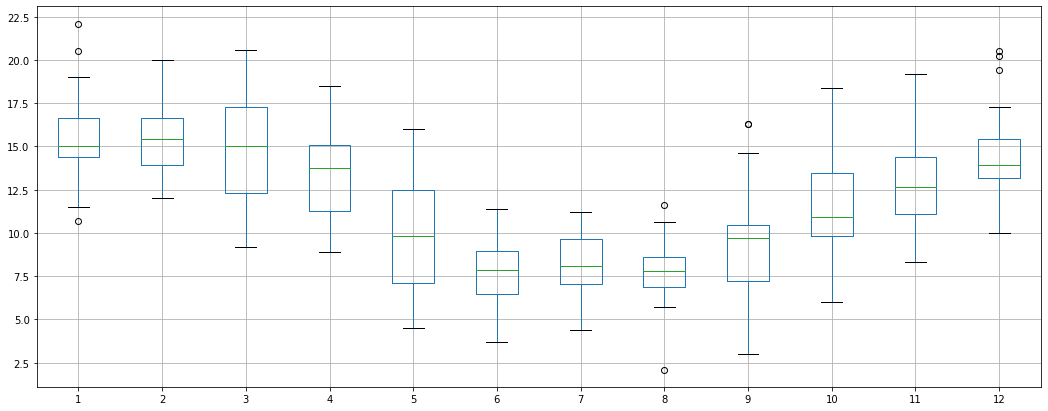

In [50]:
# Create a boxplot for monthly data(year=1990)
one_year=series['1990']
groups=one_year.groupby(Grouper(freq='M'))
months=pd.concat([pd.DataFrame(x[1].values) for x in groups],axis=1)
months.columns=range(1,13)
months.boxplot(figsize=(18,7))
plt.show()

In [51]:
#  set figsize
from matplotlib.pyplot import figure
figure(figsize=(18, 7))

<Figure size 1296x504 with 0 Axes>

<Figure size 1296x504 with 0 Axes>

## Heatmaps
A matrix of numbers can be plotted as a surface, where the values in each cell of the matrix are
assigned a unique color. This is called a heatmap, as larger values can be drawn with warmer
colors (yellows and reds) and smaller values can be drawn with cooler colors (blues and greens).
Like the box and whisker plots, we can compare observations between intervals using a heat
map.

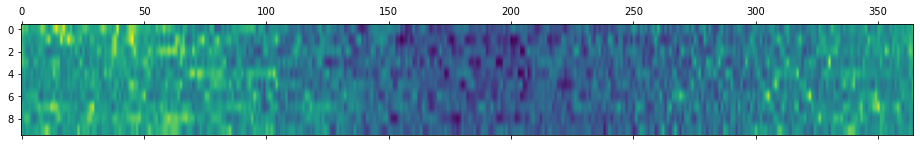

In [56]:
# create a heat map of yearly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years = years.T   # Transpose because row will represent year and columns represents day
pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

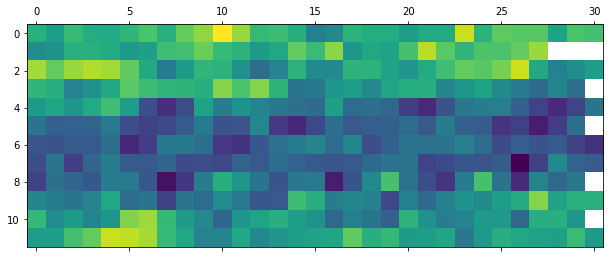

In [58]:
# create a heat map of monthly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
from pandas import concat
series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,
parse_dates=True, squeeze=True)
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
months=months.T
pyplot.matshow(months, interpolation=None, aspect='auto')
pyplot.show()

## Lag Scatter Plots
Time series modeling assumes a relationship between an observation and the previous observation.A useful type of plot
to explore the relationship between each observation and a lag of that observation is called the
scatter plot. Pandas has a built-in function for exactly this called the lag plot. It plots the
observation at time t on the x-axis and the observation at the next time step (t+1) on the
y-axis.

* If the points cluster along a diagonal line from the bottom-left to the top-right of the plot,
it suggests a positive correlation relationship.
* If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests
a negative correlation relationship.

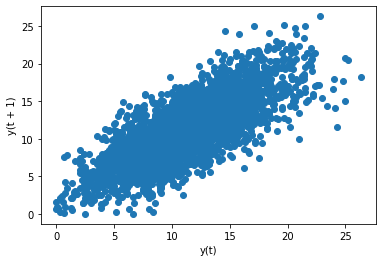

In [70]:
#create a scatter plot ( 1 lag value)
from pandas.plotting import lag_plot

lag_plot(series)
plt.show()

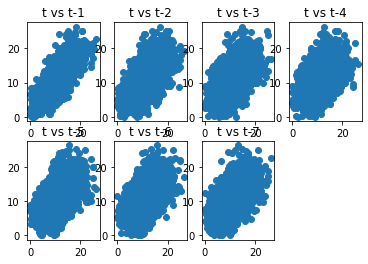

In [78]:
# Create Multiple scatter plot
values = DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))   
dataframe = concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
plt.show()


In [79]:
dataframe

,t,t-1,t-2,t-3,t-4,t-5,t-6,t-7
0,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN
2,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN
3,14.6,18.8,17.9,20.7,NaN,NaN,NaN,NaN
4,15.8,14.6,18.8,17.9,20.7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3645,14.0,14.6,12.9,10.0,13.9,13.2,13.1,15.4
3646,13.6,14.0,14.6,12.9,10.0,13.9,13.2,13.1
3647,13.5,13.6,14.0,14.6,12.9,10.0,13.9,13.2
3648,15.7,13.5,13.6,14.0,14.6,12.9,10.0,13.9


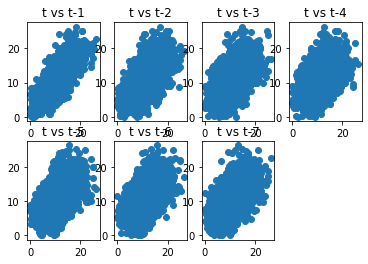

In [98]:
# Create multiple scatter plot [ another implimentationc- easy]
dataframe=pd.DataFrame()
dataframe['t']=series.values
for i in range(1,8):
    dataframe['t-'+str(i)]=series.shift(i).values
plt.figure(1)
for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
plt.show()    


In [93]:
dataframe

,t,t-1,t-2,t-3,t-4,t-5,t-6,t-7
0,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17.9,20.7,NaN,NaN,NaN,NaN,NaN,NaN
2,18.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN
3,14.6,18.8,17.9,20.7,NaN,NaN,NaN,NaN
4,15.8,14.6,18.8,17.9,20.7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3645,14.0,14.6,12.9,10.0,13.9,13.2,13.1,15.4
3646,13.6,14.0,14.6,12.9,10.0,13.9,13.2,13.1
3647,13.5,13.6,14.0,14.6,12.9,10.0,13.9,13.2
3648,15.7,13.5,13.6,14.0,14.6,12.9,10.0,13.9


## Autocorrelation Plot
We can quantify the strength and type of relationship between observations and their lags. In
statistics, this is called correlation, and when calculated against lag values in time series, it is
called autocorrelation (self-correlation).

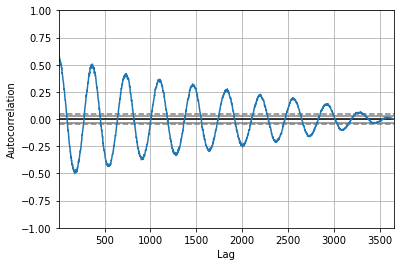

In [100]:
# Create autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.show()